In [1]:
%reload_ext autoreload
%autoreload 2
import opdproblem as opd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import joblib
import sys
from tqdm import tqdm
import time
from itertools import combinations

# Importar Dataframes de los experimentos

In [2]:
# Cargar DataFrame desde el archivo
df_unbounded_homogeneous = joblib.load('dataframes_min/df_unbounded_homogeneous.pkl')
df_unbounded_homogeneous

,clique,inf,random,both,opd,min_certificate
0,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
1,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 2), (0, 3)]"
2,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
3,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 2), (1, 3)]"
4,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 2), (0, 3)]"
...,...,...,...,...,...,...
995,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (4, 6...","[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 2), (0, 4), (0, 3), (1, 4), (0, 6..."
996,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 2), (1, 5), (1, 4), (1, 6), (1, 3)]"
997,k7,"[(0, 1), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3...","[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3..."
998,k7,"[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5..."


In [3]:
# Cargar DataFrame desde el archivo
df_unbounded_non_homogeneous = joblib.load('dataframes_min/df_unbounded_non_homogeneous.pkl')
df_unbounded_non_homogeneous

,clique,inf,random,both,opd,min_certificate
0,k4,"[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 3)]"
1,k4,"[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 3)]"
2,k4,"[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 3)]"
3,k4,"[(0, 1), (1, 2), (0, 3), (2, 3), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 2), (2, 3), (1, 3)]"
4,k4,"[(0, 3), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 3), (1, 3)]"
...,...,...,...,...,...,...
1245,k8,"[(0, 1), (0, 7), (1, 5), (0, 6), (1, 7), (0, 2...","[(0, 1), (0, 7), (1, 5), (0, 6), (1, 7), (0, 2...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 7), (1, 5), (0, 6)]"
1246,k8,"[(0, 1), (1, 6), (0, 6)]","[(0, 1), (1, 6), (0, 6)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 6)]"
1247,k8,"[(0, 1), (0, 3), (3, 4), (1, 4)]","[(0, 1), (0, 3), (3, 4), (1, 4)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (3, 4)]"
1248,k8,"[(0, 1), (0, 7), (1, 2), (1, 4), (4, 5), (1, 7...","[(0, 1), (0, 7), (1, 2), (1, 4), (1, 7), (4, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 7), (1, 2), (1, 4), (0, 2), (1, 7..."


In [4]:
# Cargar DataFrame desde el archivo
df_bounded_homogeneous = joblib.load('dataframes_min/df_bounded_homogeneous.pkl')
df_bounded_homogeneous.head(50)

,clique,inf,random,both,opd,min_certificate
0,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
1,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
2,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
3,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
4,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
5,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
6,k4,"[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]"
7,k4,"[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (2, 3), (1, 3)]"
8,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"
9,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]"


In [13]:
# Cargar DataFrame desde el archivo
df_bounded_non_homogeneous_100 = joblib.load('dataframes_min/df_bounded_non_homogeneous_100.pkl')
df_bounded_non_homogeneous_100_2 = joblib.load('dataframes_min/df_bounded_non_homogeneous_100_2.pkl')

df_bounded_non_homogeneous_100 = pd.concat([df_bounded_non_homogeneous_100, df_bounded_non_homogeneous_100_2])
df_bounded_non_homogeneous_100.head(40)

,clique,inf,random,both,opd,min_certificate
0,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
1,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
2,k4,"[(2, 3), (0, 2), (1, 3), (0, 1)]","[(0, 1), (1, 3), (0, 2), (2, 3)]","[(0, 1), (0, 2)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (0, 2)]"
3,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
4,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
5,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
6,k4,"[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (0, 3)]"
7,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
8,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
9,k4,"[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (0, 3)]"


In [6]:
# Cargar DataFrame desde el archivo
df_bounded_non_homogeneous_1000 = joblib.load('dataframes_min/df_bounded_non_homogeneous_1000.pkl')
df_bounded_non_homogeneous_1000

,clique,inf,random,both,opd,min_certificate
0,k4,"[(2, 3), (0, 2), (1, 3)]","[(2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(2, 3), (0, 2), (1, 3), (0, 1)]"
1,k4,"[(0, 2), (1, 2)]","[(0, 2), (1, 2)]","[(0, 1), (0, 2), (0, 3), (1, 2)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 2), (1, 2)]"
2,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"
3,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"
4,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"
...,...,...,...,...,...,...
2745,k14,"[(6, 12), (1, 12), (0, 6)]","[(6, 12), (1, 12), (0, 6)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(6, 12), (1, 12), (0, 1), (0, 6)]"
2746,k14,"[(1, 2), (2, 11), (0, 11)]","[(1, 2), (2, 11), (0, 11)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 2), (2, 11), (0, 11)]"
2747,k14,"[(1, 6), (0, 6)]","[(1, 6), (0, 6)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 6), (0, 6)]"
2748,k14,"[(1, 3), (3, 5), (0, 5)]","[(1, 3), (3, 5), (0, 5)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (1, 3), (3, 5), (0, 5)]"


In [7]:
# Cargar DataFrame desde el archivo
df_bounded_non_homogeneous_10000 = joblib.load('dataframes_min/df_bounded_non_homogeneous_10000.pkl')
df_bounded_non_homogeneous_10000_2 = joblib.load('dataframes_min/df_bounded_non_homogeneous_10000_2.pkl')


df_bounded_non_homogeneous_10000 = pd.concat([df_bounded_non_homogeneous_10000, df_bounded_non_homogeneous_10000_2])
df_bounded_non_homogeneous_10000

,clique,inf,random,both,opd,min_certificate
0,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"
1,k4,"[(0, 2), (1, 2)]","[(0, 2), (1, 2)]","[(0, 1), (0, 2), (0, 3), (1, 2)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1), (0, 2), (1, 2)]"
2,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"
3,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"
4,k4,"[(2, 3), (0, 2), (1, 3)]","[(2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(2, 3), (0, 2), (1, 3), (0, 1)]"
...,...,...,...,...,...,...
4995,k23,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"
4996,k23,"[(0, 18), (1, 16), (16, 18)]","[(0, 18), (1, 16), (16, 18)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 18), (1, 16), (16, 18)]"
4997,k23,"[(5, 15), (5, 11), (1, 15), (1, 21), (11, 18),...","[(5, 15), (5, 11), (1, 15), (1, 21), (11, 18),...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(5, 15), (5, 11), (1, 15), (1, 21), (11, 18),..."
4998,k23,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7b...,"[(0, 1)]"


# Query ratio para cada tipo de problema

## Division 

In [179]:
# Función para calcular la longitud de una lista y dividir por la longitud de otra lista
def calcular_division(row, min='min_certificate' , alg='inf'):
   
    return len(row[alg]) / len(row[min])


In [180]:
df_unbounded_homogeneous['division_inf'] = df_unbounded_homogeneous.apply(lambda row: calcular_division(row), axis=1)
df_unbounded_homogeneous['division_random'] = df_unbounded_homogeneous.apply(lambda row: calcular_division(row, alg='random'), axis=1)
df_unbounded_homogeneous['division_both'] = df_unbounded_homogeneous.apply(lambda row: calcular_division(row, alg='both'), axis=1)

#df_unbounded_homogeneous

In [181]:
df_unbounded_non_homogeneous['division_inf'] = df_unbounded_non_homogeneous.apply(lambda row: calcular_division(row), axis=1)
df_unbounded_non_homogeneous['division_random'] = df_unbounded_non_homogeneous.apply(lambda row: calcular_division(row, alg='random'), axis=1)
df_unbounded_non_homogeneous['division_both'] = df_unbounded_non_homogeneous.apply(lambda row: calcular_division(row, alg='both'), axis=1)

#df_unbounded_non_homogeneous

In [182]:
df_bounded_homogeneous['division_inf'] = df_bounded_homogeneous.apply(lambda row: calcular_division(row), axis=1)
df_bounded_homogeneous['division_random'] = df_bounded_homogeneous.apply(lambda row: calcular_division(row, alg='random'), axis=1)
df_bounded_homogeneous['division_both'] = df_bounded_homogeneous.apply(lambda row: calcular_division(row, alg='both'), axis=1)

#df_bounded_homogeneous

In [183]:
df_bounded_non_homogeneous_100['division_inf'] = df_bounded_non_homogeneous_100.apply(lambda row: calcular_division(row), axis=1)
df_bounded_non_homogeneous_100['division_random'] = df_bounded_non_homogeneous_100.apply(lambda row: calcular_division(row, alg='random'), axis=1)
df_bounded_non_homogeneous_100['division_both'] = df_bounded_non_homogeneous_100.apply(lambda row: calcular_division(row, alg='both'), axis=1)

#df_bounded_non_homogeneous_100

In [184]:
df_bounded_non_homogeneous_1000['division_inf'] = df_bounded_non_homogeneous_1000.apply(lambda row: calcular_division(row), axis=1)
df_bounded_non_homogeneous_1000['division_random'] = df_bounded_non_homogeneous_1000.apply(lambda row: calcular_division(row, alg='random'), axis=1)
df_bounded_non_homogeneous_1000['division_both'] = df_bounded_non_homogeneous_1000.apply(lambda row: calcular_division(row, alg='both'), axis=1)

#df_bounded_non_homogeneous_1000

In [185]:
df_bounded_non_homogeneous_10000['division_inf'] = df_bounded_non_homogeneous_10000.apply(lambda row: calcular_division(row), axis=1)
df_bounded_non_homogeneous_10000['division_random'] = df_bounded_non_homogeneous_10000.apply(lambda row: calcular_division(row, alg='random'), axis=1)
df_bounded_non_homogeneous_10000['division_both'] = df_bounded_non_homogeneous_10000.apply(lambda row: calcular_division(row, alg='both'), axis=1)

#df_bounded_non_homogeneous_10000

## Query ratio

In [186]:
data1 =[]
data2 =[]
data3 =[]
data4 =[]
data5 =[]
data6 =[]
col =['division_inf', 'division_random', 'division_both', 'cantidad_cliques']
filas = ['unbounded_homogeneous', 'unbounded_non_homogeneous', 'bounded_homogeneous', 
         'bounded_non_homogeneous_100', 'bounded_non_homogeneous_1000', 'bounded_non_homogeneous_10000']
for name in col[:-1]:
    data1.append(df_unbounded_homogeneous[name].max())
    data2.append(df_unbounded_non_homogeneous[name].max())
    data3.append(df_bounded_homogeneous[name].max())
    data4.append(df_bounded_non_homogeneous_100[name].max())
    data5.append(df_bounded_non_homogeneous_1000[name].max())
    data6.append(df_bounded_non_homogeneous_10000[name].max())
    
data1.append(df_unbounded_homogeneous.shape[0])
data2.append(df_unbounded_non_homogeneous.shape[0])
data3.append(df_bounded_homogeneous.shape[0])
data4.append(df_bounded_non_homogeneous_100.shape[0])
data5.append(df_bounded_non_homogeneous_1000.shape[0])
data6.append(df_bounded_non_homogeneous_10000.shape[0])
data = [data1, data2, data3, data4, data5, data6]

df = pd.DataFrame(data=data, index=filas, columns=['inf', 'random', 'both', 'cantidad_cliques'])

In [187]:
df_unbounded_homogeneous

,clique,inf,random,both,opd,min_certificate,division_inf,division_random,division_both
0,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]",1.000000,1.000000,1.000000
1,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 2), (0, 3)]",1.666667,1.666667,1.000000
2,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]",1.000000,1.000000,1.000000
3,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (1, 3)]",1.666667,1.666667,1.666667
4,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 2), (0, 3)]",1.666667,1.666667,1.000000
...,...,...,...,...,...,...,...,...,...
995,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (4, 6...","[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 4), (0, 3), (1, 4), (0, 6...",1.285714,1.500000,0.785714
996,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (1, 5), (1, 4), (1, 6), (1, 3)]",1.833333,2.833333,1.833333
997,k7,"[(0, 1), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3...","[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3...",1.285714,1.500000,0.785714
998,k7,"[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(3, 4), (4, 6), (0, 2), (0, 5), (1, 6), (2, 5...",1.050000,1.050000,0.550000


In [188]:
df

,inf,random,both,cantidad_cliques
unbounded_homogeneous,1.833333,3.000000,1.833333,1000
unbounded_non_homogeneous,3.000000,3.000000,6.000000,1250
bounded_homogeneous,1.636364,1.909091,1.000000,1000
bounded_non_homogeneous_100,2.333333,5.000000,9.500000,2000
bounded_non_homogeneous_1000,2.500000,3.000000,11.500000,2750
bounded_non_homogeneous_10000,2.500000,2.500000,21.500000,5000


In [242]:
df_unbounded_homogeneous[df_unbounded_homogeneous['division_inf']>=1.833333]

,clique,inf,random,both,opd,min_certificate,division_inf,division_random,division_both
751,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (1, 5), (1, 4), (1, 6), (1, 3)]",1.833333,1.833333,1.833333
754,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (1, 5), (1, 4), (1, 6), (1, 3)]",1.833333,2.500000,1.833333
765,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 4), (0, 3), (0, 6), (0, 2), (0, 5)]",1.833333,2.000000,1.000000
769,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 4), (0, 3), (0, 6), (0, 2), (0, 5)]",1.833333,2.500000,1.000000
772,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 4), (0, 3), (0, 6), (0, 2), (0, 5)]",1.833333,1.833333,1.000000
778,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 4), (0, 3), (0, 6), (0, 2), (0, 5)]",1.833333,2.500000,1.000000
781,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 4), (0, 3), (0, 6), (0, 2), (0, 5)]",1.833333,2.833333,1.000000
784,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (1, 5), (0, 3), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (1, 5), (1, 4), (1, 6), (1, 3)]",1.833333,2.166667,1.833333
789,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (1, 5), (4, 6), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (1, 5), (1, 4), (1, 6), (1, 3)]",1.833333,2.000000,1.833333
791,k7,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (0, 4), (3, 4), (4, 6), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 4), (0, 3), (0, 6), (0, 2), (0, 5)]",1.833333,2.000000,1.000000


In [239]:
df_unbounded_homogeneous.head(39)

,clique,inf,random,both,opd,min_certificate,division_inf,division_random,division_both
0,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]",1.000000,1.000000,1.000000
1,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 2), (0, 3)]",1.666667,1.666667,1.000000
2,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]",1.000000,1.000000,1.000000
3,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (1, 3)]",1.666667,1.666667,1.666667
4,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 2), (0, 3)]",1.666667,1.666667,1.000000
5,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 3), (2, 3)]",1.250000,1.250000,1.250000
6,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]",1.000000,1.000000,1.000000
7,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 2), (0, 3)]",1.666667,1.666667,1.000000
8,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]",1.000000,1.200000,1.000000
9,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 2), (0, 3)]",1.666667,1.666667,1.000000


# Desarrollo

In [189]:
# %%timeit
# C = G.min_certificate()

In [190]:
df_bounded_homogeneous.loc[7]['inf']

[(0, 1), (1, 2), (0, 3), (2, 3), (0, 2), (1, 3)]

In [229]:
def min_certificate2(opd, C, type='homogeneus'):
    s = 0
    t = 1
    # Create original instance and graph with edges removed
    graph = opd.graph.copy()
    graph_alg = opd.graph.copy()


    # List that will be the minimum certificate
    C_min = C.copy()

    # Calculate optimal path for the instance
    opt_path = nx.shortest_path(graph, source=s, target=t, weight='weight')
    opt_path = [(opt_path[i], opt_path[i + 1]) for i in range(len(opt_path) - 1)]
    opt_path = [(min(u, v), max(u, v)) for u, v in opt_path]   
    opt_path_weigth = nx.shortest_path_length(graph, source=s, target=t, weight='weight')

    # Create graph to calculate minimun certificate in homogeneus
    if type == 'homogeneus':
        opt_path.append((0,1)) # Necesary edge in homogeneus 
    graph_alg.remove_edges_from(opt_path)

    if type == 'homogeneus':
        while opd.certificate(C_min, opt_path_weigth):
            try:
                p_remove = nx.shortest_path(graph_alg, source=s, target=t, weight='weight')
                p_remove = [(p_remove[i], p_remove[i + 1]) for i in range(len(p_remove) - 1)]
                p_remove = [(min(u, v), max(u, v), graph[u][v]['weight']) for u, v in p_remove]
    
                min_edge = min(p_remove, key=lambda x: x[2])
                min_edge = (min_edge[0], min_edge[1])
                graph_alg.remove_edges_from([min_edge])
    
    
                C_min.remove(min_edge)            
            except nx.NetworkXNoPath:
                return C_min
    elif type == 'non_homogeneus':
        while opd.certificate(C_min, opt_path_weigth):
            try:
                p_remove = nx.shortest_path(graph_alg, source=s, target=t, weight='weight')
                p_remove = [(p_remove[i], p_remove[i + 1]) for i in range(len(p_remove) - 1)]
                p_remove = [(min(u, v), max(u, v), graph[u][v]['area'][0]) for u, v in p_remove]
                
                max_area_edge = max(p_remove, key=lambda x: x[2])
                max_area_edge = (max_area_edge[0], max_area_edge[1])
                print(C_min)
                print(max_area_edge)
                if max_area_edge in C_min:
                    graph_alg.remove_edges_from([max_area_edge])
                    C_min.remove(max_area_edge)
                else:
                    print('else', C_min)

                    return C_min
            except nx.NetworkXNoPath:
                return C_min
    print('while', C_min)
    return C_min

In [230]:
C_min = min_certificate2(df_bounded_non_homogeneous_1000.loc[2712]['opd'], df_bounded_non_homogeneous_1000.loc[2712]['inf'], type='non_homogeneus')
print(C_min)

[(3, 8), (0, 13), (0, 2), (1, 13), (3, 6), (1, 6), (2, 8)]
(1, 6)
while [(3, 8), (0, 13), (0, 2), (1, 13), (3, 6), (2, 8)]
None


In [223]:
df_bounded_non_homogeneous_1000.loc[2712]['min_certificate']

[(3, 8), (0, 13), (1, 13), (3, 6), (1, 6), (2, 8)]

In [224]:
df_bounded_non_homogeneous_1000.loc[2712]['inf']

[(3, 8), (0, 13), (0, 2), (1, 13), (3, 6), (1, 6), (2, 8)]

In [222]:
es = df_bounded_non_homogeneous_1000.loc[2712]['opd'].certificate([(3, 8), (0, 13), (0, 2), (1, 13), (3, 6), (2, 8)], shortest_path_weigth)
print(es)

False


# Revision

In [217]:
df_bounded_non_homogeneous_1000.tail(50)

,clique,inf,random,both,opd,min_certificate,division_inf,division_random,division_both
2700,k14,"[(1, 9), (0, 9), (0, 10), (1, 10)]","[(1, 9), (0, 9), (0, 10), (1, 10)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 9), (0, 10), (1, 10)]",1.333333,1.333333,7.333333
2701,k14,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1)]",1.000000,1.000000,1.000000
2702,k14,"[(0, 10), (1, 10)]","[(0, 10), (1, 10)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 10), (1, 10)]",0.666667,0.666667,7.333333
2703,k14,"[(6, 12), (1, 12), (0, 6)]","[(6, 12), (1, 12), (0, 6)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(6, 12), (1, 12), (0, 1), (0, 6)]",0.750000,0.750000,6.250000
2704,k14,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1)]",1.000000,1.000000,1.000000
2705,k14,"[(0, 12), (1, 12)]","[(0, 12), (1, 12)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 12), (1, 12), (0, 1)]",0.666667,0.666667,8.000000
2706,k14,"[(0, 9), (1, 9)]","[(0, 9), (1, 9)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 9), (1, 9)]",0.666667,0.666667,7.000000
2707,k14,"[(0, 4), (1, 4)]","[(0, 4), (1, 4)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 4), (1, 4)]",0.666667,0.666667,5.333333
2708,k14,"[(0, 12), (1, 12)]","[(0, 12), (1, 12)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 12), (1, 12), (0, 1)]",0.666667,0.666667,8.000000
2709,k14,"[(0, 8), (1, 8)]","[(0, 8), (1, 8)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x73...,"[(0, 1), (0, 8), (1, 8)]",0.666667,0.666667,6.666667


In [ ]:
opd_false

In [200]:
opd_false = df_bounded_non_homogeneous_1000.loc[11]['opd']

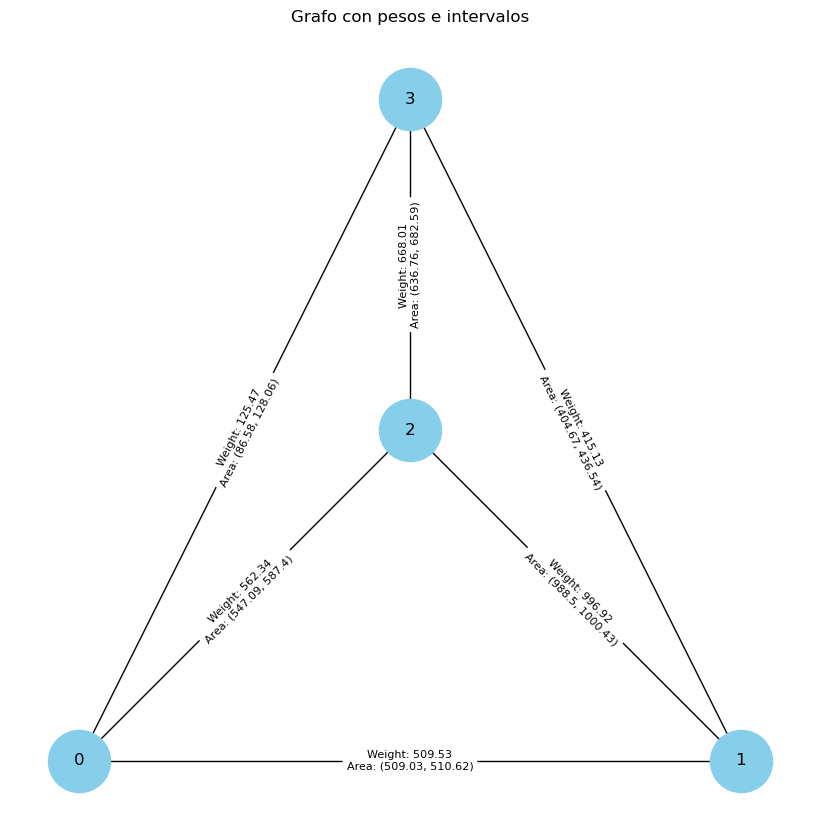

In [195]:

# Redondear los pesos a dos decimales
G = opd_false.graph
for u, v in G.edges():
    G[u][v]['weight'] = round(G[u][v]['weight'], 2)

# Redondear las áreas a dos decimales
for u, v in G.edges():
    area_start, area_end = G[u][v]['area']
    G[u][v]['area'] = (round(area_start, 2), round(area_end, 2))

# Obtener los pesos y áreas de las aristas
weights = [G[u][v]['weight'] for u, v in G.edges()]
areas = [G[u][v]['area'] for u, v in G.edges()]

# Dibujar el grafo con más espacio entre nodos
plt.figure(figsize=(8, 8))
pos = nx.planar_layout(G)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)

# Ajustar las etiquetas de peso para que no se superpongan
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Weight: {G[u][v]['weight']}\nArea: {G[u][v]['area']}" for u, v in G.edges()}, 
                             label_pos=0.5, font_size=8)
    
# Mostrar la gráfica
plt.title('Grafo con pesos e intervalos')
plt.show()

In [134]:
df_unbounded_homogeneous.loc[4]

clique                                                            k4
inf                         [(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]
random                      [(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]
both                                        [(0, 1), (0, 2), (0, 3)]
opd                <opdproblem.OPDproblem.OPDGraph object at 0x73...
min_certificate                             [(0, 1), (0, 2), (0, 3)]
division_inf                                                1.666667
division_random                                             1.666667
division_both                                                    1.0
Name: 4, dtype: object

In [135]:
shortest_path = nx.shortest_path(G, source=0, target=1, weight='weight')
shortest_path_weigth = nx.shortest_path_length(G, source=0, target=1, weight='weight')

print(shortest_path)

[0, 2, 1]


In [101]:
g_alg = G.copy()
g_alg.remove_edges_from([(0, 1), (0, 2), (0, 3)])
shortest_path = nx.shortest_path(g_alg, source=0, target=1, weight='weight')
print(shortest_path)

NetworkXNoPath: No path between 0 and 1.

In [107]:
L = [(0, 1, 1), (0, 2, 2), (0, 3, 3)]
arista_menor_peso = min(L, key=lambda x: x[2])
print((arista_menor_peso[0], arista_menor_peso[1]))

(0, 1)


In [20]:
opd_ex = df_bounded_non_homogeneous_100.iloc[196]['opd']

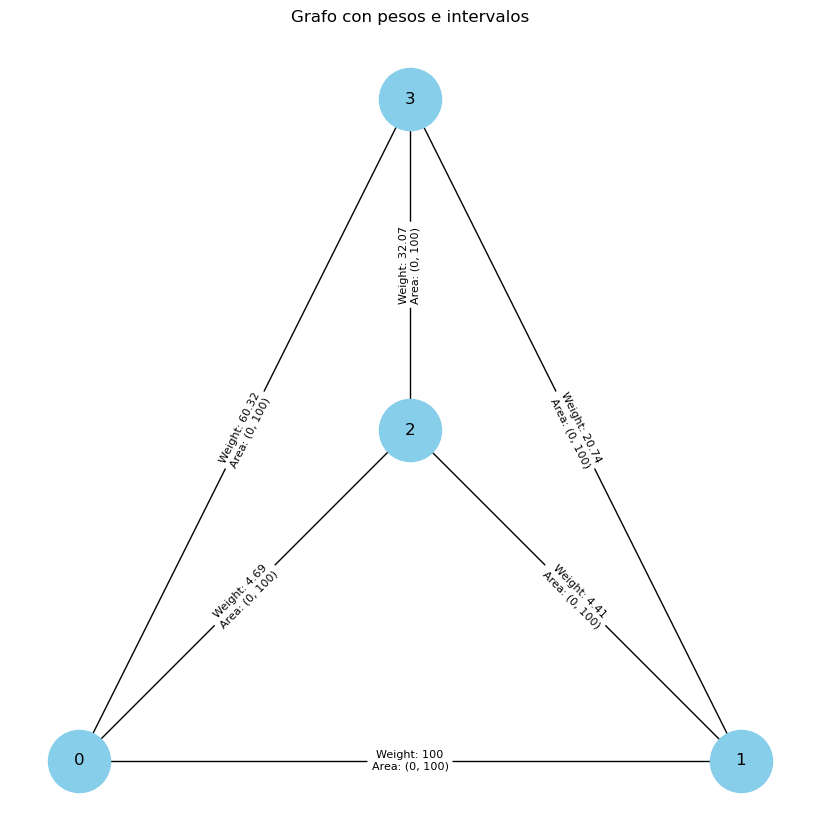

In [11]:

# Redondear los pesos a dos decimales
G = opd_ex.graph
for u, v in G.edges():
    G[u][v]['weight'] = round(G[u][v]['weight'], 2)

# Redondear las áreas a dos decimales
for u, v in G.edges():
    area_start, area_end = G[u][v]['area']
    G[u][v]['area'] = (round(area_start, 2), round(area_end, 2))

# Obtener los pesos y áreas de las aristas
weights = [G[u][v]['weight'] for u, v in G.edges()]
areas = [G[u][v]['area'] for u, v in G.edges()]

# Dibujar el grafo con más espacio entre nodos
plt.figure(figsize=(8, 8))
pos = nx.planar_layout(G)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)

# Ajustar las etiquetas de peso para que no se superpongan
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Weight: {G[u][v]['weight']}\nArea: {G[u][v]['area']}" for u, v in G.edges()}, 
                             label_pos=0.5, font_size=8)
    
# Mostrar la gráfica
plt.title('Grafo con pesos e intervalos')
plt.show()

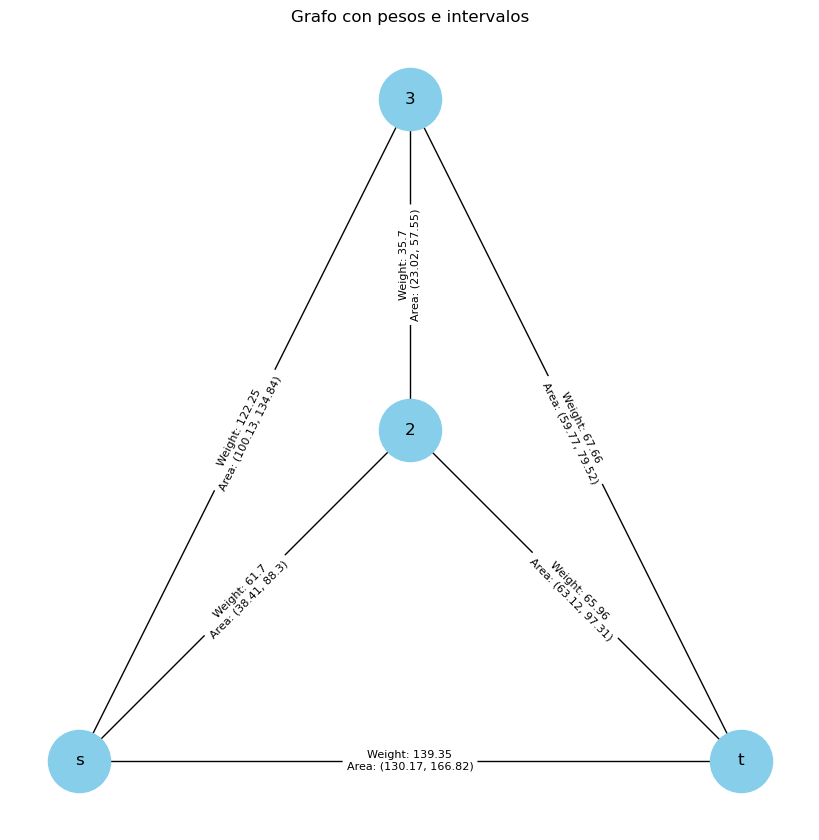

In [21]:
# Redondear los pesos a dos decimales
G = opd_ex.graph
for u, v in G.edges():
    G[u][v]['weight'] = round(G[u][v]['weight'], 2)

# Redondear las áreas a dos decimales
for u, v in G.edges():
    area_start, area_end = G[u][v]['area']
    G[u][v]['area'] = (round(area_start, 2), round(area_end, 2))

# Renombrar los nodos 0 y 1 por 's' y 't'
mapping = {0: 's', 1: 't'}
G = nx.relabel_nodes(G, mapping)

# Obtener los pesos y áreas de las aristas
weights = [G[u][v]['weight'] for u, v in G.edges()]
areas = [G[u][v]['area'] for u, v in G.edges()]

# Dibujar el grafo con más espacio entre nodos
plt.figure(figsize=(8, 8))
pos = nx.planar_layout(G)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)

# Ajustar las etiquetas de peso para que no se superpongan
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Weight: {G[u][v]['weight']}\nArea: {G[u][v]['area']}" for u, v in G.edges()}, 
                             label_pos=0.5, font_size=8)
    
# Mostrar la gráfica
plt.title('Grafo con pesos e intervalos')
plt.show()


In [19]:
df_bounded_non_homogeneous_100[df_bounded_non_homogeneous_100['clique']=='k4'].tail(60)

,clique,inf,random,both,opd,min_certificate
190,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
191,k4,"[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 3), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (0, 3)]"
192,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (0, 2), (0, 3)]"
193,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
194,k4,"[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (1, 2), (0, 3), (0, 2), (1, 3)]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (1, 2), (0, 3), (1, 3)]"
195,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
196,k4,"[(0, 2), (1, 2)]","[(0, 1), (0, 2), (1, 2)]","[(0, 1), (0, 2), (0, 3), (1, 2)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1), (0, 2), (1, 2)]"
197,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
198,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"
199,k4,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x71...,"[(0, 1)]"


In [100]:
es = opd_false.certificate([(0, 1), (1, 2), (1, 3)], shortest_path_weigth)
print(es)

True


# Combinado

In [9]:
#%%timeit

s = 0 
t = 1

optimal_path = nx.shortest_path(opd_false.graph, source=s, target=t, weight='weight')
optimal_path_weight = nx.shortest_path_length(opd_false.graph, source=s, target=t, weight='weight')

edges_certificate = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
edges_certificate = [(min(u, v), max(u, v)) for u, v in edges_certificate]
edges_graph = list(opd_false.graph.edges())

# Eliminar aristas que pertenecen al camino optimo
edges_graph = list(set(edges_graph) - set(edges_certificate))

k = False
for i in range(len(edges_graph) + 1):
    for j, test in enumerate(combinations(edges_graph, i)):

        # Certificate bot
        # Create list to test certificate
        cert_test_bot = set(edges_certificate)
        cert_test_bot.update(test)
        l_aux1 = list(cert_test_bot)
        #print(cert_test)
        # Test certificate
        certificate_bot = opd_false.certificate(l_aux1, optimal_path_weight, alpha=1)
        if certificate_bot:
            prop = l_aux1
            break        
            
        # Certificate top
        # Create list to test certificate
        cert_test_top = set(list(opd_false.graph.edges()))
        cert_test_top = cert_test_top.difference(test)
        l_aux2 = list(cert_test_top)

        # Test certificate
        certificate_top = opd_false.certificate(l_aux2, optimal_path_weight, alpha=1)
        if certificate_top:
            prop = l_aux2
            break
        elif j == len(list(combinations(edges_graph, i))) - 1:  
            k = True
            break
    if certificate_bot:
        break
    if k:
        
        break


In [10]:
print(prop)

[(0, 1), (0, 3), (1, 3), (3, 4)]


In [19]:

#%%timeit
# Variable compartida para indicar si se ha encontrado un certificado
cert_found = False

# Función certificate_bot
def certificate_bot(edges_certificate, edges_graph, optimal_path_weight, opd_false):
    global cert_found, cert_result
    for i in range(len(edges_graph) + 1):
        for j, test in enumerate(combinations(edges_graph, i)):
    
             # Certificate bot
            # Create list to test certificate
            cert_test_bot = set(edges_certificate)
            cert_test_bot.update(test)
            l_aux1 = list(cert_test_bot)
            #print(cert_test)
            # Test certificate
            certificate_bot = opd_false.certificate(l_aux1, optimal_path_weight, alpha=1)
            if certificate_bot:
                cert_found = True
                cert_result = l_aux1
                return l_aux1

# Función certificate_top
def certificate_top(edges_graph, optimal_path_weight, opd_false):
    global cert_found, cert_result
    for i in range(len(edges_graph) + 1):
        for j, test in enumerate(combinations(edges_graph, i)):
                
            # Certificate top
            # Create list to test certificate
            cert_test_top = set(list(opd_false.graph.edges()))
            cert_test_top = cert_test_top.difference(test)
            l_aux2 = list(cert_test_top)
    
            # Test certificate
            certificate_top = opd_false.certificate(l_aux2, optimal_path_weight, alpha=1)
            if certificate_top:
                prop = l_aux2
                break
            elif j == len(list(combinations(edges_graph, i))) - 1:  
                cert_found = True
                cert_result = prop
                return prop

# Initial setup
s = 0 
t = 1
optimal_path = nx.shortest_path(opd_false.graph, source=s, target=t, weight='weight')
optimal_path_weight = nx.shortest_path_length(opd_false.graph, source=s, target=t, weight='weight')

edges_certificate = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
edges_certificate = [(min(u, v), max(u, v)) for u, v in edges_certificate]
edges_graph = list(opd_false.graph.edges())

# Eliminar aristas que pertenecen al camino optimo
edges_graph = list(set(edges_graph) - set(edges_certificate))

# Ejecutar en paralelo usando threads
def parallel_execution():
    # Certificate bot
    thread1 = threading.Thread(target=certificate_bot, args=(edges_certificate, edges_graph, optimal_path_weight, opd_false,))
    thread1.start()

    # Certificate top
    thread2 = threading.Thread(target=certificate_top, args=(edges_graph, optimal_path_weight, opd_false,))
    thread2.start()

    thread1.join()
    thread2.join()

    # Detener la ejecución si se encuentra un certificado
    if cert_found:
        return cert_result
    else:
        return None

cert_result = parallel_execution()
print("Resultado obtenido:", cert_result)


KeyboardInterrupt: 

In [14]:
df_bounded_non_homogeneous_100.loc[285]['min_certificate']

[(0, 1), (0, 3), (1, 3), (3, 4)]

# Top

In [ ]:

s = 0 
t = 1

optimal_path = nx.shortest_path(opd_false.graph, source=s, target=t, weight='weight')
optimal_path_weight = nx.shortest_path_length(opd_false.graph, source=s, target=t, weight='weight')

edges_certificate = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
edges_certificate = [(min(u, v), max(u, v)) for u, v in edges_certificate]
edges_graph = list(opd_false.graph.edges())

# Eliminar aristas que pertenecen al camino optimo
edges_graph = list(set(edges_graph) - set(edges_certificate))

k = False
for i in range(len(edges_graph) + 1):
    for j, test in enumerate(combinations(edges_graph, i)):
            
        # Certificate top
        # Create list to test certificate
        cert_test_top = set(list(opd_false.graph.edges()))
        cert_test_top = cert_test_top.difference(test)
        l_aux2 = list(cert_test_top)

        # Test certificate
        certificate_top = opd_false.certificate(l_aux2, optimal_path_weight, alpha=1)
        if certificate_top:
            prop = l_aux2
            break
        elif j == len(list(combinations(edges_graph, i))) - 1:  
            k = True
            break
    if k:
        break

print(prop)    
            

# Bot

In [22]:
%%timeit -r 1 -n 1

s = 0 
t = 1

optimal_path = nx.shortest_path(opd_false.graph, source=s, target=t, weight='weight')
optimal_path_weight = nx.shortest_path_length(opd_false.graph, source=s, target=t, weight='weight')

edges_certificate = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
edges_certificate = [(min(u, v), max(u, v)) for u, v in edges_certificate]
edges_graph = list(opd_false.graph.edges())

# Eliminar aristas que pertenecen al camino optimo
edges_graph = list(set(edges_graph) - set(edges_certificate))


for i in range(len(edges_graph) + 1):
    for j, test in enumerate(combinations(edges_graph, i)):

         # Certificate bot
        # Create list to test certificate
        cert_test_bot = set(edges_certificate)
        cert_test_bot.update(test)
        l_aux1 = list(cert_test_bot)
        #print(cert_test)
        # Test certificate
        certificate_bot = opd_false.certificate(l_aux1, optimal_path_weight, alpha=1)
        if certificate_bot:
            break        
       
    if certificate_bot:
        break


2min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
df_bounded_non_homogeneous_100.loc[37]

clique                                                            k4
inf                                                 [(0, 3), (1, 3)]
random                                      [(0, 1), (0, 3), (1, 3)]
both                        [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]
opd                <opdproblem.OPDproblem.OPDGraph object at 0x7a...
min_certificate                             [(0, 1), (0, 3), (1, 3)]
Name: 37, dtype: object